## PD 7
### Adrian Kamiński

In [1]:
import warnings
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline


warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv(
    'https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/test.csv')
train = pd.read_csv(
    'https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/train.csv')
val = pd.read_csv(
    'https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/val.csv')
test_X = test.drop('class', axis=1)
y_true = test['class'].values

### Cel: wykorzytanie algorytmu GMM do wykrywania próbek odstających.

Podzielimy nasz dataset na jeden klaster. Jeśli prawdopodobnieństwo należenia punktu do klastru będzie małe to będzie oznaczało, że jest on outlierem.

In [3]:
gmm = GaussianMixture(n_components=1)

In [4]:
gmm.fit(train)

GaussianMixture()

In [5]:
log_prob_val = gmm.score_samples(val)
log_prob_test = gmm.score_samples(test_X)

In [6]:
def plot_prob(length, log_prob):
    plt.plot(range(length), np.exp(log_prob))
    plt.xlabel('Numer obserwacji')
    plt.ylabel('Prawdopodobienstwo należenia do clustra')
    plt.show()

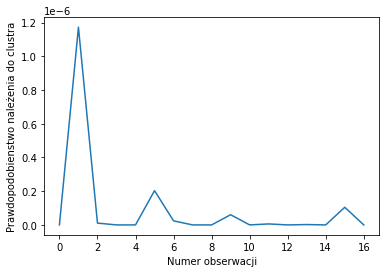

In [7]:
plot_prob(len(val), log_prob_val)

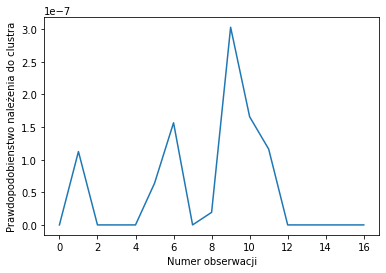

In [8]:
plot_prob(len(test_X), log_prob_test)

Widzimy wiele obserwacji które mają bardzo małe prawdopodobieństwa należenia do klastra, może łatwiej będzie znaleźć punkt odcięcia (wartość od której uznajemy, że punkt jest wartością odstającą) na logarytmie z prawdopodobieństwa

In [9]:
def plot_logprob(length, log_prob):
    plt.plot(range(length), log_prob)
    plt.xlabel('Numer obserwacji')
    plt.ylabel('Logarytm prawdopodobienstwa należenia do clustra')

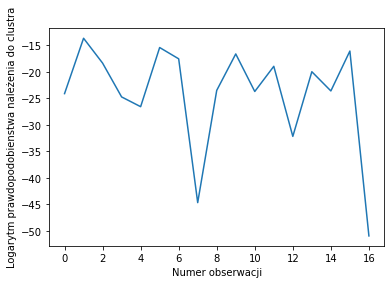

In [10]:
plot_logprob(len(val), log_prob_val)

Wybieramy punkt odciecia na zbiorze walidacyjnym. U góry widzimy 3 punkty które możemy uznać za obserwacje odstające.
Przyjmijmy więc, że -30 jest naszym punktem odcięcia.

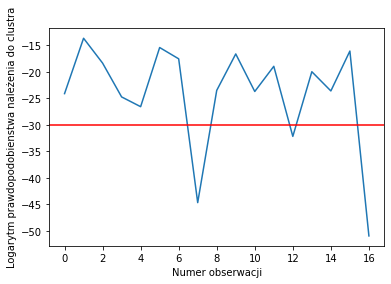

In [11]:
plot_logprob(len(val), log_prob_val)
plt.axhline(y=-30, c='r')
plt.show()

Pozostało więc sprawdzić jak sprawdzi się nasz model na zbiorze testowym

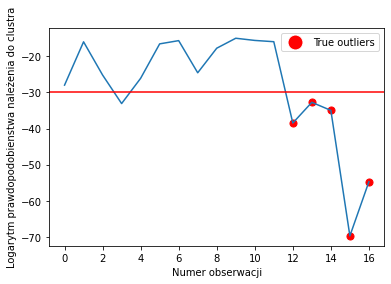

In [12]:
plot_logprob(len(test_X), log_prob_test)
for i in range(len(test_X)):
    if y_true[i] == 1:
        plt.scatter(i,  log_prob_test[i], marker='o', c='r', s=50)
plt.axhline(y=-30, c='r')
red_circle = Line2D([0], [0], marker='o', color='w', label='True outliers',
                    markerfacecolor='r', markersize=15),
plt.legend(handles=red_circle)
plt.show()

Widzimy, że wszystkie wartości odstające zostały sklasyfikowane prawidłowo, i tylko jedna została dodatkowo oznaczona jako odstająca

In [13]:
y_pred = [1 if x < -30 else 0 for x in log_prob_test]

In [14]:
y_pred

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [15]:
print(classification_report(y_true, y_pred,
      target_names=['Inliers', 'Outliers']))

              precision    recall  f1-score   support

     Inliers       1.00      0.92      0.96        12
    Outliers       0.83      1.00      0.91         5

    accuracy                           0.94        17
   macro avg       0.92      0.96      0.93        17
weighted avg       0.95      0.94      0.94        17



Wysokie wartości użytych metryk wskazują na to, że algorytm GMM może być wykorzystywany do wykrywania próbek odstających.